<a href="https://colab.research.google.com/github/ChandulaJ/AI-CNN-/blob/main/CNN_Demo_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Implementation with PyTorch

Dataset: CIFAR10 (Ref: https://www.cs.toronto.edu/~kriz/cifar.html)
Info: <br>
> Number of Images: 60000,  32 * 32 in resolution
> Number of Classes: 10 (Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck)

**Prerequisites**
> PyTorch Basics: https://youtu.be/OIenNRt2bjg
> Python Basics: https://youtu.be/rfscVS0vtbw

**References:**
1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://wandb.ai/authors/ayusht/reports/Implementing-Dropout-Regularization-in-PyTorch--VmlldzoxNTgwOTE
3. https://medium.com/artificialis/dropout-regularization-using-pytorch-in-python-7765337cb158
3. https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py
4. https://pytorch.org/vision/main/datasets.html
5. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
6. https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#:~:text=Tensors%20are%20a%20specialized%20data,GPUs%20or%20other%20hardware%20accelerators.

## Load Google Drive

In [1]:
# Load Google drive to Colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load the Necessary Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

## Define transforms (Data Augmentation)

In [3]:
# Define transforms

# For training set
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# For testing set
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


**Tensors**
> - Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
> - Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data.
> - Tensors are also optimized for automatic differentiation.


# Load datasets and define the

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets (https://pytorch.org/vision/main/datasets.html).

> PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [4]:
# Load datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 43312256.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
# Define batch size
batch_size = 25

# created dataloaders
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

**Try!**
Here we have used only two sets are training and the testing tests. However, for the hyperparameter tuning we need the validation set as well. Therefore, find out a solution to split the test set into two and, redo the dataset loading and dataloader preparation.

In [6]:
# Define the classes in the dataset
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## Display a Sample of Images

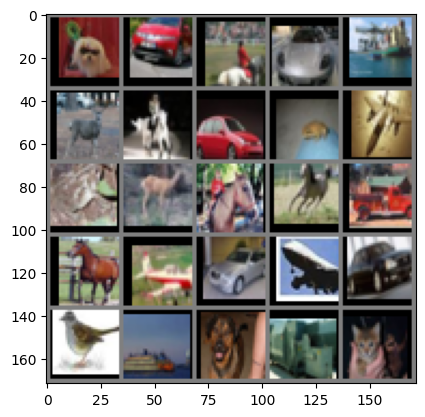

In [7]:
# Visualize a batch of images

def imshow(img):
    img = img / 2 + 0.5;  # Unnormalized

    # Convert image into a Numpy Array for data manipuation and usage in
    # matplotlib
    npimg = img.numpy()

    # In numpy images defined as no. of channels, height, width format
    # However, matplotlib expects in height, width, channels format
    # So, we need to transform the npimg.
    npimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg)
    plt.show()


# Get some random training images

# Show images
dataiter = iter(trainloader)
images,labels = next(dataiter)
imshow(torchvision.utils.make_grid(images,nrow=5))

# Print labels


## Define CNN

In [8]:
# Define the CNN model
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5,1,0)
    self.bn1 = nn.BatchNorm2d(6)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,3)
    self.bn2 = nn.BatchNorm2d(16)
    self.dropout = nn.Dropout(0.2)
    self.fc1 = nn.Linear(16*6*6,144)
    self.bn3 = nn.BatchNorm1d(144)
    self.fc2 = nn.Linear(144,72)
    self.fc3 = nn.Linear(72,10)

  def forward(self, x):
    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.pool(F.relu(self.bn2(self.conv2(x))))
    x = torch.flatten(x,1) #flatten all dimesions except batch
    x = F.relu(self.bn3(self.fc1(x)))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    return self.fc3(x)


In [9]:
# Initialize a instance of the model
model = CNN()


## Define the Device

In [10]:
# If cuda GPU is available, it will be set as the device otherwise cpu

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cuda


In [11]:
# Transfer model to the device
model.to(device)


CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=576, out_features=144, bias=True)
  (bn3): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=144, out_features=72, bias=True)
  (fc3): Linear(in_features=72, out_features=10, bias=True)
)

In [12]:

# Generate model summary

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
       BatchNorm2d-2            [-1, 6, 28, 28]              12
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 12, 12]             880
       BatchNorm2d-5           [-1, 16, 12, 12]              32
         MaxPool2d-6             [-1, 16, 6, 6]               0
            Linear-7                  [-1, 144]          83,088
       BatchNorm1d-8                  [-1, 144]             288
           Dropout-9                  [-1, 144]               0
           Linear-10                   [-1, 72]          10,440
           Linear-11                   [-1, 10]             730
Total params: 95,926
Trainable params: 95,926
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

## Define the Loss Function and Optimizer

In [13]:
# Define loss function and the optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

Cross entropy loss

Cat : 0.7 <br>
Dog : 0.2 <br>
Deer : 0.1 <br>
 = 1

## Train the model

In [14]:
# # Train the defined model
# for epoch in range(25):
#   running_loss = 0.0
#   for i,data in enumerate(trainloader):
#     inputs,labels = data[0].to(device), data[1].to(device)
#     optimizer.zero_grad()
#     output = model(inputs)
#     loss = criterion(output,labels)
#     loss.backward()
#     optimizer.step()

#     running_loss += loss.item()
#     if i % 2000 == 1999:
#       print(f"[{epoch+1},(i+1: 5d)] loss: {running_loss/2000:.3f}")
#       running_loss = 0.0

# print("training has being completed")

## Model Saving and Loading

In [15]:
# Saving

model_save_path = '/content/drive/MyDrive/Model_Trained_values/cifar_net_demo.pth'

# Save the model state dictionary
#torch.save(model.state_dict(), model_save_path)

In [16]:
# Loading
model = CNN()

model.load_state_dict(torch.load(model_save_path))


<All keys matched successfully>

In [17]:
# Once more send the model to the device after loading
model.to(device)



CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=576, out_features=144, bias=True)
  (bn3): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=144, out_features=72, bias=True)
  (fc3): Linear(in_features=72, out_features=10, bias=True)
)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Performance with Testset

In [19]:
# Measure performance of the test set
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images,labels = data[0].to(device), data[1].to(device)

    outputs = model(images)

    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f"Accuracy of the network on 10000 test :  {100*correct//total}%")

Accuracy of the network on 10000 test :  61%


**Try!**
In the above cases, we did not utilized any validation set and no hyperparameter tuning has been performed either. So model performance should be able to improve by performing some hyperparameter tuning.

**Try!**
Furthermore, try to measure the training and validation set losses/accuracies within the training loop and plot them in a single plot. In this way, we will be able to identify whether model is overfitting or not. In the above case, neither training or validation losses/accuracies were calculated. Try to record the performance once per certain number of batches.

**Try!**
Try to integrate early stopping into the training loop when the model performance w.r.t the validation set is no longer improving with further training. Try to think of a possible logic and add that into the training loop accordingly.

## Performance for Different Classes

In [21]:
# Measure the performance w.r.t each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname:0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images,labels = data[0].to(device), data[1].to(device)

    outputs = model(images)

    _,predicted = torch.max(outputs,1)

    for label,prediction in zip(labels,predicted):
      if label == prediction:
        correct_pred[classes[label]] +=1
      total_pred[classes[label]] += 1

  for classname,correct_count in correct_pred.items():
    accuracy = 100 * correct_count / total_pred[classname]
    print(f"Accuracy for class {classname}: {accuracy}%")

Accuracy for class airplane: 65.1%
Accuracy for class automobile: 71.4%
Accuracy for class bird: 49.7%
Accuracy for class cat: 41.7%
Accuracy for class deer: 49.4%
Accuracy for class dog: 49.6%
Accuracy for class frog: 76.5%
Accuracy for class horse: 67.8%
Accuracy for class ship: 76.1%
Accuracy for class truck: 69.2%
